In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stat

sns.set()


In [338]:
raw_data = pd.read_csv("1.04.csv")
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


## Drop Null Values

In [339]:
data = raw_data
#data = raw_data.drop(['Model'],axis=1)
#data = data.dropna(axis=0)
#data.describe(include='all')

## Removing outliers

In [340]:
### Plotting distributions:
# sns.displot(data['Price'])

### Removing outliers:
for cat in ("Price", "Mileage"):
    q = data[cat].quantile(0.99)
    data = data[data[cat] < q]

q = data["Year"].quantile(0.01)
data = data[data["Year"] > q]

### Removing incorrect values:
data = data[data["EngineV"] < 6.5]

data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,nan,6,nan,nan,4,2,nan,291
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,848,nan,1467,nan,nan,1807,3505,nan,181
mean,NaN,18162.62,NaN,160.66,2.45,NaN,NaN,2006.70,NaN
std,NaN,19003.11,NaN,95.70,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21650.00,NaN,225.50,3.00,NaN,NaN,2012.00,NaN


## Clean data

In [341]:
data_cleaned = data.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,nan,6,nan,nan,4,2,nan,291
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,848,nan,1467,nan,nan,1807,3505,nan,181
mean,NaN,18162.62,NaN,160.66,2.45,NaN,NaN,2006.70,NaN
std,NaN,19003.11,NaN,95.70,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21650.00,NaN,225.50,3.00,NaN,NaN,2012.00,NaN


## Checking OLS assumptions

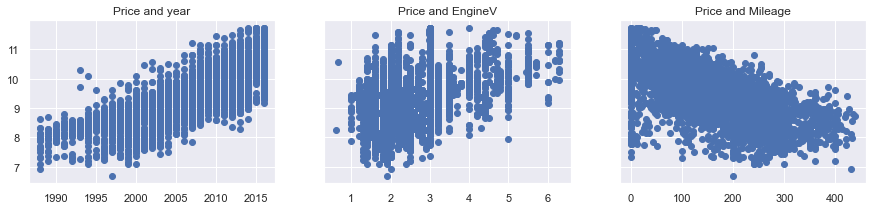

In [343]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')
plt.show()

### Relaxing the assumptions

In [342]:
# Price is not normally distributed

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicollinearity

vif of 1 is no multicollinearity, <5 is good, >6 is bad

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.36,Year
2,7.67,EngineV


In [345]:
data_cleaned = data_cleaned.drop(["Year"], axis=1)

## Create dummy variables

In [346]:
datadummy = pd.get_dummies(data_cleaned, drop_first = True)
datadummy.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange

In [407]:
cols = datadummy.columns.values
data_preprocessed = datadummy[cols]
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [443]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

## Feature Selection

In [444]:
from sklearn.feature_selection import f_regression


p_values = f_regression(inputs,targets)[1]
p_values.round(3)
print(len(inputs.columns.values))
inputs = inputs.drop([inputs.columns.values[i] for i in range(len(inputs.columns.values)) if p_values[i] > 0.005],axis=1)
print(len(inputs.columns.values))

307
84


In [445]:
scaler = StandardScaler()
scaler.fit(inputs)
scinputs = scaler.transform(inputs)

In [446]:
x_train, x_test, y_train, y_test = train_test_split(scinputs, targets, test_size=0.2, random_state = 42)

## Regression

In [447]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

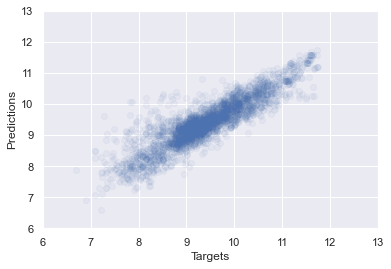

In [448]:
y_hat = reg.predict(x_train)


plt.scatter(y_train, y_hat, alpha=0.05)
plt.xlabel("Targets")
plt.ylabel("Predictions")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

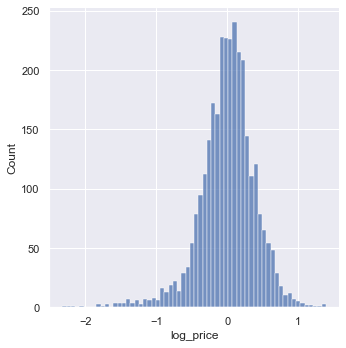

In [449]:
sns.displot(y_train-y_hat)

In [450]:
reg.score(x_train,y_train)

0.7911638572855209

In [451]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.37
1,EngineV,0.13
2,Brand_BMW,-0.01
3,Brand_Mercedes-Benz,-0.05
4,Brand_Mitsubishi,-0.11
5,Brand_Renault,-0.20
6,Brand_Toyota,-0.08
7,Brand_Volkswagen,-0.13
8,Body_hatch,-0.10
9,Body_sedan,-0.10


## Testing

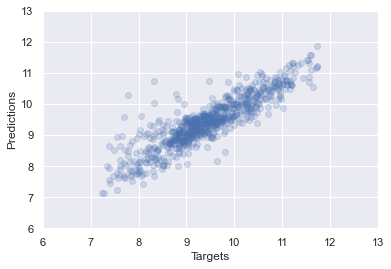

In [452]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets")
plt.ylabel("Predictions")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [457]:
y_test = y_test.reset_index(drop=True)
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
#df_pf = df_pf[df_pf['Prediction'] < 15]
#df_pf = df_pf[df_pf['Prediction'] > 0]
df_pf['Prediction'] = np.exp(df_pf['Prediction'])
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,12291.32,16400.00,4108.68,25.05
1,22614.17,22800.00,185.83,0.82
2,7794.94,4600.00,-3194.94,69.46
3,30918.92,46900.00,15981.08,34.07
4,51664.76,92222.00,40557.24,43.98
5,91105.40,99999.00,8893.60,8.89
6,33056.57,48000.00,14943.43,31.13
7,51044.26,53999.00,2954.74,5.47
8,28546.99,24900.00,-3646.99,14.65
9,44800.62,104000.00,59199.38,56.92


In [458]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,17135.88,18957.69,1821.81,35.26
std,15923.18,20169.54,9593.78,69.90
min,1255.96,1389.00,-41863.15,0.00
25%,7808.34,7200.00,-2054.22,10.58
50%,12283.33,11800.00,187.63,22.19
75%,20241.55,22533.74,3368.99,38.44
max,142637.77,125000.00,76635.91,1111.00


In [459]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
200,75555.00,75555.00,0.00,0.00
443,9000.47,9000.00,-0.47,0.01
548,13592.68,13600.00,7.32,0.05
15,10910.97,10900.00,-10.97,0.10
207,8010.54,8000.00,-10.54,0.13
68,21855.15,21800.00,-55.15,0.25
343,9573.46,9600.00,26.54,0.28
129,107684.33,107999.00,314.67,0.29
507,17955.46,17900.00,-55.46,0.31
466,6120.16,6100.00,-20.16,0.33


In [489]:
print("{0:.2f}% of predictions within 50% of correct value".format(len(df_pf[df_pf['Difference%'] < 50])/len(df_pf)*100))

86.56% of predictions within 50% of correct value
